In [ ]:
import sys
import pandas as pd
import numpy as np
import IPython
from IPython.display import display

import matplotlib as mpl
%matplotlib inline
import matplotlib.pyplot as plt

# https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
plt.style.use('seaborn-v0_8')   # The 'seaborn' style is deprecated

print( f"Python {sys.version}" )
print( f"Pandas {pd.__version__}" )
print( f"NumPy {np.__version__}" )
print( f"IPython {IPython.__version__}" )
print( f"Matplotlib {mpl.__version__}" )

Python 3.10.12 (main, Sep 11 2024, 15:47:36) [GCC 11.4.0]
Pandas 2.2.2
NumPy 1.26.4
IPython 7.34.0
Matplotlib 3.7.1


#Import data

###Cause of Death

In [ ]:
df_cause_of_death = pd.read_csv('https://raw.githubusercontent.com/imyajaii/dads5001-mini-project-01/refs/heads/main/dataset/cause_of_deaths.csv')
# Preview
df_cause_of_death.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6120 entries, 0 to 6119
Data columns (total 34 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Country/Territory                           6120 non-null   object
 1   Code                                        6120 non-null   object
 2   Year                                        6120 non-null   int64 
 3   Meningitis                                  6120 non-null   int64 
 4   Alzheimer's Disease and Other Dementias     6120 non-null   int64 
 5   Parkinson's Disease                         6120 non-null   int64 
 6   Nutritional Deficiencies                    6120 non-null   int64 
 7   Malaria                                     6120 non-null   int64 
 8   Drowning                                    6120 non-null   int64 
 9   Interpersonal Violence                      6120 non-null   int64 
 10  Maternal Disorders      

In [ ]:
df_cause_of_death.head()

,Country/Territory,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,...,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
0,Afghanistan,AFG,1990,2159,1116,371,2087,93,1370,1538,...,2108,3709,338,2054,4154,5945,2673,5005,323,2985
1,Afghanistan,AFG,1991,2218,1136,374,2153,189,1391,2001,...,2120,3724,351,2119,4472,6050,2728,5120,332,3092
2,Afghanistan,AFG,1992,2475,1162,378,2441,239,1514,2299,...,2153,3776,386,2404,5106,6223,2830,5335,360,3325
3,Afghanistan,AFG,1993,2812,1187,384,2837,108,1687,2589,...,2195,3862,425,2797,5681,6445,2943,5568,396,3601
4,Afghanistan,AFG,1994,3027,1211,391,3081,211,1809,2849,...,2231,3932,451,3038,6001,6664,3027,5739,420,3816


In [ ]:
df_cause_of_death['Code'].unique()

array(['AFG', 'ALB', 'DZA', 'ASM', 'AND', 'AGO', 'ATG', 'ARG', 'ARM',
       'AUS', 'AUT', 'AZE', 'BHS', 'BHR', 'BGD', 'BRB', 'BLR', 'BEL',
       'BLZ', 'BEN', 'BMU', 'BTN', 'BOL', 'BIH', 'BWA', 'BRA', 'BRN',
       'BGR', 'BFA', 'BDI', 'KHM', 'CMR', 'CAN', 'CPV', 'CAF', 'TCD',
       'CHL', 'CHN', 'COL', 'COM', 'COG', 'COK', 'CRI', 'CIV', 'HRV',
       'CUB', 'CYP', 'CZE', 'COD', 'DNK', 'DJI', 'DMA', 'DOM', 'ECU',
       'EGY', 'SLV', 'GNQ', 'ERI', 'EST', 'SWZ', 'ETH', 'FJI', 'FIN',
       'FRA', 'GAB', 'GMB', 'GEO', 'DEU', 'GHA', 'GRC', 'GRL', 'GRD',
       'GUM', 'GTM', 'GIN', 'GNB', 'GUY', 'HTI', 'HND', 'HUN', 'ISL',
       'IND', 'IDN', 'IRN', 'IRQ', 'IRL', 'ISR', 'ITA', 'JAM', 'JPN',
       'JOR', 'KAZ', 'KEN', 'KIR', 'KWT', 'KGZ', 'LAO', 'LVA', 'LBN',
       'LSO', 'LBR', 'LBY', 'LTU', 'LUX', 'MDG', 'MWI', 'MYS', 'MDV',
       'MLI', 'MLT', 'MHL', 'MRT', 'MUS', 'MEX', 'FSM', 'MDA', 'MCO',
       'MNG', 'MNE', 'MAR', 'MOZ', 'MMR', 'NAM', 'NRU', 'NPL', 'NLD',
       'NZL', 'NIC',

In [ ]:
df_cause_of_death['Code'].unique()
lst = df_cause_of_death['Code'].unique()
len(lst)

204

###Continent

In [ ]:
df_continent = pd.read_csv('https://raw.githubusercontent.com/imyajaii/dads5001-mini-project-01/refs/heads/main/dataset/countryContinent.csv',encoding='latin-1') # Try 'latin-1' encoding

# Preview
df_continent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          249 non-null    object 
 1   code_2           248 non-null    object 
 2   code_3           249 non-null    object 
 3   country_code     249 non-null    int64  
 4   iso_3166_2       249 non-null    object 
 5   continent        240 non-null    object 
 6   sub_region       240 non-null    object 
 7   region_code      240 non-null    float64
 8   sub_region_code  240 non-null    float64
dtypes: float64(2), int64(1), object(6)
memory usage: 17.6+ KB


###World Population

In [ ]:
df_population = pd.read_csv('https://raw.githubusercontent.com/imyajaii/dads5001-mini-project-01/refs/heads/main/dataset/World-population-by-countries-dataset.csv')

# Preview
df_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 64 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  266 non-null    object 
 1   Country Code  266 non-null    object 
 2   1960          264 non-null    float64
 3   1961          264 non-null    float64
 4   1962          264 non-null    float64
 5   1963          264 non-null    float64
 6   1964          264 non-null    float64
 7   1965          264 non-null    float64
 8   1966          264 non-null    float64
 9   1967          264 non-null    float64
 10  1968          264 non-null    float64
 11  1969          264 non-null    float64
 12  1970          264 non-null    float64
 13  1971          264 non-null    float64
 14  1972          264 non-null    float64
 15  1973          264 non-null    float64
 16  1974          264 non-null    float64
 17  1975          264 non-null    float64
 18  1976          264 non-null    

#Cleansing

##World Population

### Drop unnecessary column

In [ ]:
df_population.head()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,57702.0,58044.0,...,102565.0,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0,107195.0
1,Africa Eastern and Southern,AFE,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,152752671.0,156876454.0,...,547482863.0,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0,694665117.0
2,Afghanistan,AFG,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,10174840.0,10399936.0,...,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0,39835428.0
3,Africa Western and Central,AFW,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,109701811.0,112195950.0,...,370243017.0,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0,470898870.0
4,Angola,AGO,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,5781305.0,5774440.0,...,25107925.0,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0,33933611.0


In [ ]:
# prompt: drop column 1960 - 1989 , 2020 , 2021 of df_population

columns_to_drop = [str(year) for year in range(1960, 1990)] + ['2020', '2021']
df_population = df_population.drop(columns=columns_to_drop)
df_population


,Country Name,Country Code,1990,1991,1992,1993,1994,1995,1996,1997,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,62152.0,64623.0,68240.0,72495.0,76705.0,80324.0,83211.0,85450.0,...,101665.0,102050.0,102565.0,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0
1,Africa Eastern and Southern,AFE,304648010.0,313394693.0,322270073.0,331265579.0,340379934.0,349605660.0,358953595.0,368440591.0,...,518468229.0,532760424.0,547482863.0,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0
2,Afghanistan,AFG,12412311.0,13299016.0,14485543.0,15816601.0,17075728.0,18110662.0,18853444.0,19357126.0,...,29185511.0,30117411.0,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0
3,Africa Western and Central,AFW,204803865.0,210332267.0,215976366.0,221754806.0,227692136.0,233807627.0,240114179.0,246613750.0,...,350556886.0,360285439.0,370243017.0,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0
4,Angola,AGO,11848385.0,12248901.0,12657361.0,13075044.0,13503753.0,13945205.0,14400722.0,14871572.0,...,23356247.0,24220660.0,25107925.0,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,1862000.0,1898000.0,1932000.0,1965000.0,1997000.0,2029000.0,2059000.0,2086000.0,...,1775680.0,1791000.0,1807106.0,1818117.0,1812771.0,1788196.0,1777557.0,1791003.0,1797085.0,1788878.0
262,"Yemen, Rep.",YEM,11709987.0,12302127.0,12954157.0,13634082.0,14297617.0,14913313.0,15469274.0,15975676.0,...,23154854.0,23807586.0,24473176.0,25147112.0,25823488.0,26497881.0,27168210.0,27834811.0,28498683.0,29161922.0
263,South Africa,ZAF,36800507.0,37718952.0,38672611.0,39633754.0,40564061.0,41435761.0,42241007.0,42987456.0,...,51216967.0,52003759.0,52832659.0,53687125.0,54544184.0,55386369.0,56207649.0,57009751.0,57792520.0,58558267.0
264,Zambia,ZMB,8036849.0,8246662.0,8451346.0,8656484.0,8869745.0,9096608.0,9339740.0,9597610.0,...,13605986.0,14023199.0,14465148.0,14926551.0,15399793.0,15879370.0,16363449.0,16853608.0,17351714.0,17861034.0


###Reshape data of Pupulation

In [ ]:
# prompt: i want to reshape  df_population of column 1990 - 2019 into row of each of Column Country Code (the new name of column is Population) keep column Country Name

df_population_melted = df_population.melt(id_vars=['Country Name', 'Country Code'],
                                         var_name='Year',
                                         value_name='Population')

df_population_melted.head()


,Country Name,Country Code,Year,Population
0,Aruba,ABW,1990,62152.0
1,Africa Eastern and Southern,AFE,1990,304648010.0
2,Afghanistan,AFG,1990,12412311.0
3,Africa Western and Central,AFW,1990,204803865.0
4,Angola,AGO,1990,11848385.0


In [ ]:
df_population_melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7980 entries, 0 to 7979
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  7980 non-null   object 
 1   Country Code  7980 non-null   object 
 2   Year          7980 non-null   object 
 3   Population    7939 non-null   float64
dtypes: float64(1), object(3)
memory usage: 249.5+ KB


##Continent

###Drop unnecessary column of continent

In [ ]:
df_continent = df_continent.drop(['country', 'code_2', 'country_code', 'iso_3166_2', 'region_code', 'sub_region_code'], axis=1)


In [ ]:
df_continent.info()
df_continent.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   code_3      249 non-null    object
 1   continent   240 non-null    object
 2   sub_region  240 non-null    object
dtypes: object(3)
memory usage: 6.0+ KB


,code_3,continent,sub_region
0,AFG,Asia,Southern Asia
1,ALA,Europe,Northern Europe
2,ALB,Europe,Southern Europe
3,DZA,Africa,Northern Africa
4,ASM,Oceania,Polynesia


##Cause of Death

###Merge data by Country code 3 digits

In [ ]:
# prompt: check if the column Code of df_cause_of_death was all in column code_3 of df_cintinent

# Convert both columns to sets for efficient comparison
cause_of_death_codes = set(df_cause_of_death['Code'].unique())
continent_codes = set(df_continent['code_3'].unique())

# Check if all codes in df_cause_of_death are present in df_continent
all_codes_present = cause_of_death_codes.issubset(continent_codes)

print(f"Are all 'Code' values from df_cause_of_death present in 'code_3' of df_continent? {all_codes_present}")


Are all 'Code' values from df_cause_of_death present in 'code_3' of df_continent? True


In [ ]:
df_join1 = pd.merge( df_cause_of_death, df_continent, left_on='Code', right_on='code_3', how='left' )
df_join1.head()

,Country/Territory,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,...,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis,code_3,continent,sub_region
0,Afghanistan,AFG,1990,2159,1116,371,2087,93,1370,1538,...,2054,4154,5945,2673,5005,323,2985,AFG,Asia,Southern Asia
1,Afghanistan,AFG,1991,2218,1136,374,2153,189,1391,2001,...,2119,4472,6050,2728,5120,332,3092,AFG,Asia,Southern Asia
2,Afghanistan,AFG,1992,2475,1162,378,2441,239,1514,2299,...,2404,5106,6223,2830,5335,360,3325,AFG,Asia,Southern Asia
3,Afghanistan,AFG,1993,2812,1187,384,2837,108,1687,2589,...,2797,5681,6445,2943,5568,396,3601,AFG,Asia,Southern Asia
4,Afghanistan,AFG,1994,3027,1211,391,3081,211,1809,2849,...,3038,6001,6664,3027,5739,420,3816,AFG,Asia,Southern Asia


In [ ]:
df_join1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6120 entries, 0 to 6119
Data columns (total 37 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Country/Territory                           6120 non-null   object
 1   Code                                        6120 non-null   object
 2   Year                                        6120 non-null   int64 
 3   Meningitis                                  6120 non-null   int64 
 4   Alzheimer's Disease and Other Dementias     6120 non-null   int64 
 5   Parkinson's Disease                         6120 non-null   int64 
 6   Nutritional Deficiencies                    6120 non-null   int64 
 7   Malaria                                     6120 non-null   int64 
 8   Drowning                                    6120 non-null   int64 
 9   Interpersonal Violence                      6120 non-null   int64 
 10  Maternal Disorders      

In [ ]:
df_join1 = df_join1.drop(['code_3'], axis=1) # Drop duplicate column
df_join1.head()

,Country/Territory,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,...,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis,continent,sub_region
0,Afghanistan,AFG,1990,2159,1116,371,2087,93,1370,1538,...,338,2054,4154,5945,2673,5005,323,2985,Asia,Southern Asia
1,Afghanistan,AFG,1991,2218,1136,374,2153,189,1391,2001,...,351,2119,4472,6050,2728,5120,332,3092,Asia,Southern Asia
2,Afghanistan,AFG,1992,2475,1162,378,2441,239,1514,2299,...,386,2404,5106,6223,2830,5335,360,3325,Asia,Southern Asia
3,Afghanistan,AFG,1993,2812,1187,384,2837,108,1687,2589,...,425,2797,5681,6445,2943,5568,396,3601,Asia,Southern Asia
4,Afghanistan,AFG,1994,3027,1211,391,3081,211,1809,2849,...,451,3038,6001,6664,3027,5739,420,3816,Asia,Southern Asia


In [ ]:
# prompt: move column continent and sub_region into next of column Code

cols = list(df_join1.columns)
continent_index = cols.index('continent')
sub_region_index = cols.index('sub_region')
code_index = cols.index('Code')

# Move 'continent' and 'sub_region' columns to the right of 'Code'
new_cols = cols[:code_index+1] + [cols[continent_index]] + [cols[sub_region_index]] + cols[code_index+1:continent_index] + cols[continent_index+1:sub_region_index] + cols[sub_region_index+1:]
df_join1 = df_join1[new_cols]

df_join1.head()


,Country/Territory,Code,continent,sub_region,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,...,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
0,Afghanistan,AFG,Asia,Southern Asia,1990,2159,1116,371,2087,93,...,2108,3709,338,2054,4154,5945,2673,5005,323,2985
1,Afghanistan,AFG,Asia,Southern Asia,1991,2218,1136,374,2153,189,...,2120,3724,351,2119,4472,6050,2728,5120,332,3092
2,Afghanistan,AFG,Asia,Southern Asia,1992,2475,1162,378,2441,239,...,2153,3776,386,2404,5106,6223,2830,5335,360,3325
3,Afghanistan,AFG,Asia,Southern Asia,1993,2812,1187,384,2837,108,...,2195,3862,425,2797,5681,6445,2943,5568,396,3601
4,Afghanistan,AFG,Asia,Southern Asia,1994,3027,1211,391,3081,211,...,2231,3932,451,3038,6001,6664,3027,5739,420,3816


###Check Invalid Country

In [ ]:
join1_codes = set(df_join1['Code'].unique())
population_codes = set(df_population_melted['Country Code'].unique())

codes_not_in_population = join1_codes - population_codes

print("Codes in df_join1['Code'] that are not in df_population['Country Code']:\n", codes_not_in_population)

Codes in df_join1['Code'] that are not in df_population['Country Code']:
 {'TKL', 'TWN', 'NIU', 'COK'}


In [ ]:
join1 = set(df_join1['Code'].unique())
population = set(df_population_melted['Country Code'].unique())

# Check if all codes in df_cause_of_death are present in df_continent
all_codes_present = join1.issubset(population)

print(f"Are all 'Code' values from df_cause_of_death present in 'code_3' of df_continent? {all_codes_present}")

Are all 'Code' values from df_cause_of_death present in 'code_3' of df_continent? False


####Import Taiwan

In [ ]:
df_taiwan = pd.read_csv('https://raw.githubusercontent.com/imyajaii/dads5001-mini-project-01/refs/heads/develop/dataset/taiwan-population.csv')
# Preview
df_taiwan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              151 non-null    object 
 1    Population       151 non-null    int64  
 2    Annual % Change  150 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.7+ KB


In [ ]:
df_taiwan.head()

,date,Population,Annual % Change
0,31/12/1950,7623130,NaN
1,31/12/1951,7934689,4.09
2,31/12/1952,8251039,3.99
3,31/12/1953,8572131,3.89
4,31/12/1954,8897776,3.80


In [ ]:
# prompt: change date of column date into year
# Assuming 'df_taiwan' is your DataFrame and 'date' is the column containing dates
df_taiwan['Year'] = pd.to_datetime(df_taiwan['date']).dt.year
df_taiwan

<ipython-input-23-22807dbae3d2>:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_taiwan['Year'] = pd.to_datetime(df_taiwan['date']).dt.year


,date,Population,Annual % Change,Year
0,31/12/1950,7623130,NaN,1950
1,31/12/1951,7934689,4.09,1951
2,31/12/1952,8251039,3.99,1952
3,31/12/1953,8572131,3.89,1953
4,31/12/1954,8897776,3.80,1954
...,...,...,...,...
146,31/12/2096,15590180,-0.62,2096
147,31/12/2097,15497260,-0.60,2097
148,31/12/2098,15408434,-0.57,2098
149,31/12/2099,15323545,-0.55,2099


In [ ]:
# prompt: create column Country in first column all data was Taiwan , column Code in second column all data was TWN and move column Year into third column

# Create new columns 'Country' and 'Code'
df_taiwan['Country'] = 'Taiwan'
df_taiwan['Code'] = 'TWN'

# Get the list of column names
cols = list(df_taiwan.columns)

# Find the index of the 'Year' column
year_index = cols.index('Year')

# Remove 'Year' from its original position
cols.pop(year_index)

# Insert 'Year' at the third position (index 2)
cols.insert(2, 'Year')

# Reorder the DataFrame columns based on the new list
df_taiwan = df_taiwan[cols]

df_taiwan.head()


,date,Population,Year,Annual % Change,Country,Code
0,31/12/1950,7623130,1950,NaN,Taiwan,TWN
1,31/12/1951,7934689,1951,4.09,Taiwan,TWN
2,31/12/1952,8251039,1952,3.99,Taiwan,TWN
3,31/12/1953,8572131,1953,3.89,Taiwan,TWN
4,31/12/1954,8897776,1954,3.80,Taiwan,TWN


In [ ]:
# prompt: drop column date , Annual % Change

df_taiwan = df_taiwan.drop(['date', ' Annual % Change'], axis=1)


In [ ]:
df_taiwan.head()

,Population,Year,Country,Code
0,7623130,1950,Taiwan,TWN
1,7934689,1951,Taiwan,TWN
2,8251039,1952,Taiwan,TWN
3,8572131,1953,Taiwan,TWN
4,8897776,1954,Taiwan,TWN


In [ ]:
df_taiwan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0    Population  151 non-null    int64 
 1   Year         151 non-null    int32 
 2   Country      151 non-null    object
 3   Code         151 non-null    object
dtypes: int32(1), int64(1), object(2)
memory usage: 4.3+ KB


In [ ]:
# prompt: change name of column

df_taiwan = df_taiwan.rename(columns={' Population': 'Population', 'Country': 'Country Name', 'Code': 'Country Code'})
df_taiwan.head()


,Population,Year,Country Name,Country Code
0,7623130,1950,Taiwan,TWN
1,7934689,1951,Taiwan,TWN
2,8251039,1952,Taiwan,TWN
3,8572131,1953,Taiwan,TWN
4,8897776,1954,Taiwan,TWN


In [ ]:
# prompt: move column in this way Country Name , Country Code , Year , Population

new_order = ['Country Name', 'Country Code', 'Year', 'Population']
df_taiwan = df_taiwan[new_order]
df_taiwan.head()


,Country Name,Country Code,Year,Population
0,Taiwan,TWN,1950,7623130
1,Taiwan,TWN,1951,7934689
2,Taiwan,TWN,1952,8251039
3,Taiwan,TWN,1953,8572131
4,Taiwan,TWN,1954,8897776


In [ ]:
df_taiwan

,Country Name,Country Code,Year,Population
0,Taiwan,TWN,1950,7623130
1,Taiwan,TWN,1951,7934689
2,Taiwan,TWN,1952,8251039
3,Taiwan,TWN,1953,8572131
4,Taiwan,TWN,1954,8897776
...,...,...,...,...
146,Taiwan,TWN,2096,15590180
147,Taiwan,TWN,2097,15497260
148,Taiwan,TWN,2098,15408434
149,Taiwan,TWN,2099,15323545


In [ ]:
# prompt: drop row that was Year 1950 - 1989 , 2020 - 2100 of df_taiwan

years_to_drop = list(range(1950, 1990)) + list(range(2020, 2101))
df_taiwan = df_taiwan[~df_taiwan['Year'].isin(years_to_drop)]


In [ ]:
df_taiwan

,Country Name,Country Code,Year,Population
40,Taiwan,TWN,1990,20586174
41,Taiwan,TWN,1991,20770620
42,Taiwan,TWN,1992,20952222
43,Taiwan,TWN,1993,21125717
44,Taiwan,TWN,1994,21293437
45,Taiwan,TWN,1995,21455813
46,Taiwan,TWN,1996,21612429
47,Taiwan,TWN,1997,21764843
48,Taiwan,TWN,1998,21913672
49,Taiwan,TWN,1999,22057214


####Join missing TWN

In [ ]:
# prompt: add row of df_taiwan in to df_population_melted

df_population_melted = pd.concat([df_population_melted, df_taiwan], ignore_index=True)
df_population_melted


,Country Name,Country Code,Year,Population
0,Aruba,ABW,1990,62152.0
1,Africa Eastern and Southern,AFE,1990,304648010.0
2,Afghanistan,AFG,1990,12412311.0
3,Africa Western and Central,AFW,1990,204803865.0
4,Angola,AGO,1990,11848385.0
...,...,...,...,...
8005,Taiwan,TWN,2015,23512136.0
8006,Taiwan,TWN,2016,23594471.0
8007,Taiwan,TWN,2017,23665024.0
8008,Taiwan,TWN,2018,23726185.0


In [ ]:
df_population_melted

,Country Name,Country Code,Year,Population
0,Aruba,ABW,1990,62152.0
1,Africa Eastern and Southern,AFE,1990,304648010.0
2,Afghanistan,AFG,1990,12412311.0
3,Africa Western and Central,AFW,1990,204803865.0
4,Angola,AGO,1990,11848385.0
...,...,...,...,...
8005,Taiwan,TWN,2015,23512136.0
8006,Taiwan,TWN,2016,23594471.0
8007,Taiwan,TWN,2017,23665024.0
8008,Taiwan,TWN,2018,23726185.0


###Check invalid after

In [ ]:
# prompt: show column Code in df_join1 was not in column Country Code in df_population

join1_codes = set(df_join1['Code'].unique())
population_codes = set(df_population_melted['Country Code'].unique())

codes_not_in_population = join1_codes - population_codes

print("Codes in df_join1['Code'] that are not in df_population['Country Code']:\n", codes_not_in_population)


Codes in df_join1['Code'] that are not in df_population['Country Code']:
 {'TKL', 'NIU', 'COK'}


In [ ]:
join1_codes = set(df_join1['Year'].unique())
population_codes = set(df_population_melted['Year'].unique())

codes_not_in_population = join1_codes - population_codes

print("Codes in df_join1['Year'] that are not in df_population['Year']:\n", codes_not_in_population)

Codes in df_join1['Year'] that are not in df_population['Year']:
 set()


In [ ]:
# prompt: check type of Year in df_join1

print(df_join1['Year'].dtype)


int64


In [ ]:
df_population_melted['Year'].unique()

array(['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019], dtype=object)

In [ ]:
# Match type of Year before Merge

df_population_melted['Year'] = df_population_melted['Year'].astype('int64')


In [ ]:
df_population_melted[df_population_melted['Population'].isnull()]

,Country Name,Country Code,Year,Population
110,Not classified,INX,1990,NaN
376,Not classified,INX,1991,NaN
642,Not classified,INX,1992,NaN
659,Kuwait,KWT,1992,NaN
908,Not classified,INX,1993,NaN
925,Kuwait,KWT,1993,NaN
1174,Not classified,INX,1994,NaN
1191,Kuwait,KWT,1994,NaN
1440,Not classified,INX,1995,NaN
1706,Not classified,INX,1996,NaN


##Creat Main Table

###Merge all data to be main Table

In [ ]:
# Merge on multiple keys: Inner join

# Alternative 1
#pd.merge(df_join1, df_population_melted, on=['StudentID', 'CourseID'], how='inner')

# Alternative 2
df_Main_data = pd.merge(df_join1, df_population_melted, left_on=['Code', 'Year'], right_on=['Country Code', 'Year'], how='outer')
df_Main_data

,Country/Territory,Code,continent,sub_region,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,...,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis,Country Name,Country Code,Population
0,NaN,NaN,NaN,NaN,1990,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aruba,ABW,62152.0
1,NaN,NaN,NaN,NaN,1991,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aruba,ABW,64623.0
2,NaN,NaN,NaN,NaN,1992,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aruba,ABW,68240.0
3,NaN,NaN,NaN,NaN,1993,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aruba,ABW,72495.0
4,NaN,NaN,NaN,NaN,1994,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aruba,ABW,76705.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8095,Zimbabwe,ZWE,Africa,Eastern Africa,2015,1439.0,754.0,215.0,3019.0,2518.0,...,2990.0,2373.0,2751.0,1956.0,4202.0,632.0,146.0,Zimbabwe,ZWE,13814642.0
8096,Zimbabwe,ZWE,Africa,Eastern Africa,2016,1457.0,767.0,219.0,3056.0,2050.0,...,3027.0,2436.0,2788.0,1962.0,4264.0,648.0,146.0,Zimbabwe,ZWE,14030338.0
8097,Zimbabwe,ZWE,Africa,Eastern Africa,2017,1460.0,781.0,223.0,2990.0,2116.0,...,2962.0,2473.0,2818.0,2007.0,4342.0,654.0,144.0,Zimbabwe,ZWE,14236599.0
8098,Zimbabwe,ZWE,Africa,Eastern Africa,2018,1450.0,795.0,227.0,2918.0,2088.0,...,2890.0,2509.0,2849.0,2030.0,4377.0,657.0,139.0,Zimbabwe,ZWE,14438812.0


###Drop Null and Duplicate columns

In [ ]:
# prompt: drop row in column Code that was NaN

df_Main_data = df_Main_data.dropna(subset=['Code'])
df_Main_data = df_Main_data.drop(['Country Name', 'Country Code'], axis=1)

In [ ]:
df_Main_data

,Country/Territory,Code,continent,sub_region,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,...,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis,Population
60,Afghanistan,AFG,Asia,Southern Asia,1990,2159.0,1116.0,371.0,2087.0,93.0,...,3709.0,338.0,2054.0,4154.0,5945.0,2673.0,5005.0,323.0,2985.0,12412311.0
61,Afghanistan,AFG,Asia,Southern Asia,1991,2218.0,1136.0,374.0,2153.0,189.0,...,3724.0,351.0,2119.0,4472.0,6050.0,2728.0,5120.0,332.0,3092.0,13299016.0
62,Afghanistan,AFG,Asia,Southern Asia,1992,2475.0,1162.0,378.0,2441.0,239.0,...,3776.0,386.0,2404.0,5106.0,6223.0,2830.0,5335.0,360.0,3325.0,14485543.0
63,Afghanistan,AFG,Asia,Southern Asia,1993,2812.0,1187.0,384.0,2837.0,108.0,...,3862.0,425.0,2797.0,5681.0,6445.0,2943.0,5568.0,396.0,3601.0,15816601.0
64,Afghanistan,AFG,Asia,Southern Asia,1994,3027.0,1211.0,391.0,3081.0,211.0,...,3932.0,451.0,3038.0,6001.0,6664.0,3027.0,5739.0,420.0,3816.0,17075728.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8095,Zimbabwe,ZWE,Africa,Eastern Africa,2015,1439.0,754.0,215.0,3019.0,2518.0,...,2108.0,381.0,2990.0,2373.0,2751.0,1956.0,4202.0,632.0,146.0,13814642.0
8096,Zimbabwe,ZWE,Africa,Eastern Africa,2016,1457.0,767.0,219.0,3056.0,2050.0,...,2160.0,393.0,3027.0,2436.0,2788.0,1962.0,4264.0,648.0,146.0,14030338.0
8097,Zimbabwe,ZWE,Africa,Eastern Africa,2017,1460.0,781.0,223.0,2990.0,2116.0,...,2196.0,398.0,2962.0,2473.0,2818.0,2007.0,4342.0,654.0,144.0,14236599.0
8098,Zimbabwe,ZWE,Africa,Eastern Africa,2018,1450.0,795.0,227.0,2918.0,2088.0,...,2240.0,400.0,2890.0,2509.0,2849.0,2030.0,4377.0,657.0,139.0,14438812.0


In [ ]:
# prompt: show null data in column Population

df_Main_data[df_Main_data['Population'].isnull()]['Code'].unique()


array(['COK', 'ERI', 'KWT', 'NIU', 'TKL'], dtype=object)

In [ ]:
# prompt: list of name of column

column_names = df_Main_data.columns.tolist()
print(column_names)

['Country/Territory', 'Code', 'continent', 'sub_region', 'Year', 'Meningitis', "Alzheimer's Disease and Other Dementias", "Parkinson's Disease", 'Nutritional Deficiencies', 'Malaria', 'Drowning', 'Interpersonal Violence', 'Maternal Disorders', 'HIV/AIDS', 'Drug Use Disorders', 'Tuberculosis', 'Cardiovascular Diseases', 'Lower Respiratory Infections', 'Neonatal Disorders', 'Alcohol Use Disorders', 'Self-harm', 'Exposure to Forces of Nature', 'Diarrheal Diseases', 'Environmental Heat and Cold Exposure', 'Neoplasms', 'Conflict and Terrorism', 'Diabetes Mellitus', 'Chronic Kidney Disease', 'Poisonings', 'Protein-Energy Malnutrition', 'Road Injuries', 'Chronic Respiratory Diseases', 'Cirrhosis and Other Chronic Liver Diseases', 'Digestive Diseases', 'Fire, Heat, and Hot Substances', 'Acute Hepatitis', 'Population']


###Rename Columns

In [ ]:
#change name of column of df_Main_data replace blank with "_" and Capitalized

df_Main_data = df_Main_data.rename(columns={'Country/Territory': 'Country', 'continent': 'Continent', 'sub_region': 'Sub_region', "Alzheimer's Disease and Other Dementias": 'Alzheimers_Disease_and_Other_Dementias', "Parkinson's Disease": 'Parkinsons_Disease', 'Nutritional Deficiencies': 'Nutritional_Deficiencies', 'Interpersonal Violence': 'Interpersonal_Violence', 'Maternal Disorders': 'Maternal_Disorders', 'HIV/AIDS': 'HIV', 'Drug Use Disorders': 'Drug_Use_Disorders', 'Cardiovascular Diseases': 'Cardiovascular_Diseases', 'Lower Respiratory Infections': 'Lower_Respiratory_Infections', 'Neonatal Disorders': 'Neonatal_Disorders', 'Alcohol Use Disorders': 'Alcohol_Use_Disorders', 'Self-harm': 'Self_harm', 'Exposure to Forces of Nature': 'Exposure_to_Forces_of_Nature', 'Diarrheal Diseases': 'Diarrheal_Diseases', 'Environmental Heat and Cold Exposure': 'Environmental_Heat_and_Cold_Exposure', 'Conflict and Terrorism': 'Conflict_and_Terrorism', 'Diabetes Mellitus': 'Diabetes_Mellitus', 'Chronic Kidney Disease': 'Chronic_Kidney_Disease', 'Protein-Energy Malnutrition': 'Protein_Energy_Malnutrition', 'Road Injuries': 'Road_Injuries', 'Chronic Respiratory Diseases': 'Chronic_Respiratory_Diseases', 'Cirrhosis and Other Chronic Liver Diseases': 'Cirrhosis_and_Other_Chronic_Liver_Diseases', 'Digestive Diseases': 'Digestive_Diseases', 'Fire, Heat, and Hot Substances': 'Fire_Heat_and_Hot_Substances', 'Acute Hepatitis': 'Acute_Hepatitis'})

In [ ]:
df_Main_data.head()

,Country,Code,Continent,Sub_region,Year,Meningitis,Alzheimers_Disease_and_Other_Dementias,Parkinsons_Disease,Nutritional_Deficiencies,Malaria,...,Chronic_Kidney_Disease,Poisonings,Protein_Energy_Malnutrition,Road_Injuries,Chronic_Respiratory_Diseases,Cirrhosis_and_Other_Chronic_Liver_Diseases,Digestive_Diseases,Fire_Heat_and_Hot_Substances,Acute_Hepatitis,Population
60,Afghanistan,AFG,Asia,Southern Asia,1990,2159.0,1116.0,371.0,2087.0,93.0,...,3709.0,338.0,2054.0,4154.0,5945.0,2673.0,5005.0,323.0,2985.0,12412311.0
61,Afghanistan,AFG,Asia,Southern Asia,1991,2218.0,1136.0,374.0,2153.0,189.0,...,3724.0,351.0,2119.0,4472.0,6050.0,2728.0,5120.0,332.0,3092.0,13299016.0
62,Afghanistan,AFG,Asia,Southern Asia,1992,2475.0,1162.0,378.0,2441.0,239.0,...,3776.0,386.0,2404.0,5106.0,6223.0,2830.0,5335.0,360.0,3325.0,14485543.0
63,Afghanistan,AFG,Asia,Southern Asia,1993,2812.0,1187.0,384.0,2837.0,108.0,...,3862.0,425.0,2797.0,5681.0,6445.0,2943.0,5568.0,396.0,3601.0,15816601.0
64,Afghanistan,AFG,Asia,Southern Asia,1994,3027.0,1211.0,391.0,3081.0,211.0,...,3932.0,451.0,3038.0,6001.0,6664.0,3027.0,5739.0,420.0,3816.0,17075728.0


In [ ]:
column_names = df_Main_data.columns.tolist()
print(column_names)

['Country', 'Code', 'Continent', 'Sub_region', 'Year', 'Meningitis', 'Alzheimers_Disease_and_Other_Dementias', 'Parkinsons_Disease', 'Nutritional_Deficiencies', 'Malaria', 'Drowning', 'Interpersonal_Violence', 'Maternal_Disorders', 'HIV', 'Drug_Use_Disorders', 'Tuberculosis', 'Cardiovascular_Diseases', 'Lower_Respiratory_Infections', 'Neonatal_Disorders', 'Alcohol_Use_Disorders', 'Self_harm', 'Exposure_to_Forces_of_Nature', 'Diarrheal_Diseases', 'Environmental_Heat_and_Cold_Exposure', 'Neoplasms', 'Conflict_and_Terrorism', 'Diabetes_Mellitus', 'Chronic_Kidney_Disease', 'Poisonings', 'Protein_Energy_Malnutrition', 'Road_Injuries', 'Chronic_Respiratory_Diseases', 'Cirrhosis_and_Other_Chronic_Liver_Diseases', 'Digestive_Diseases', 'Fire_Heat_and_Hot_Substances', 'Acute_Hepatitis', 'Population']


###Add Column Total amount of Death by Cause and Ratio of Death per Population

In [ ]:
# prompt: add column total_dead that sum from column Meningitis to column Acute_Hepatitis
#Use column_to_sum for represent all cause of death
columns_to_sum = ['Meningitis', 'Alzheimers_Disease_and_Other_Dementias', 'Parkinsons_Disease',
                  'Nutritional_Deficiencies', 'Malaria', 'Drowning', 'Interpersonal_Violence',
                  'Maternal_Disorders', 'HIV', 'Drug_Use_Disorders', 'Tuberculosis', 'Cardiovascular_Diseases',
                  'Lower_Respiratory_Infections', 'Neonatal_Disorders', 'Alcohol_Use_Disorders', 'Self_harm',
                  'Exposure_to_Forces_of_Nature', 'Diarrheal_Diseases', 'Environmental_Heat_and_Cold_Exposure',
                  'Neoplasms', 'Conflict_and_Terrorism', 'Diabetes_Mellitus', 'Chronic_Kidney_Disease',
                  'Poisonings', 'Protein_Energy_Malnutrition', 'Road_Injuries', 'Chronic_Respiratory_Diseases',
                  'Cirrhosis_and_Other_Chronic_Liver_Diseases', 'Digestive_Diseases', 'Fire_Heat_and_Hot_Substances', 'Acute_Hepatitis']

df_Main_data['Total_Dead'] = df_Main_data[columns_to_sum].sum(axis=1)


In [ ]:
df_Main_data

,Country,Code,Continent,Sub_region,Year,Meningitis,Alzheimers_Disease_and_Other_Dementias,Parkinsons_Disease,Nutritional_Deficiencies,Malaria,...,Poisonings,Protein_Energy_Malnutrition,Road_Injuries,Chronic_Respiratory_Diseases,Cirrhosis_and_Other_Chronic_Liver_Diseases,Digestive_Diseases,Fire_Heat_and_Hot_Substances,Acute_Hepatitis,Population,Total_Dead
60,Afghanistan,AFG,Asia,Southern Asia,1990,2159.0,1116.0,371.0,2087.0,93.0,...,338.0,2054.0,4154.0,5945.0,2673.0,5005.0,323.0,2985.0,12412311.0,147971.0
61,Afghanistan,AFG,Asia,Southern Asia,1991,2218.0,1136.0,374.0,2153.0,189.0,...,351.0,2119.0,4472.0,6050.0,2728.0,5120.0,332.0,3092.0,13299016.0,156844.0
62,Afghanistan,AFG,Asia,Southern Asia,1992,2475.0,1162.0,378.0,2441.0,239.0,...,386.0,2404.0,5106.0,6223.0,2830.0,5335.0,360.0,3325.0,14485543.0,169156.0
63,Afghanistan,AFG,Asia,Southern Asia,1993,2812.0,1187.0,384.0,2837.0,108.0,...,425.0,2797.0,5681.0,6445.0,2943.0,5568.0,396.0,3601.0,15816601.0,182230.0
64,Afghanistan,AFG,Asia,Southern Asia,1994,3027.0,1211.0,391.0,3081.0,211.0,...,451.0,3038.0,6001.0,6664.0,3027.0,5739.0,420.0,3816.0,17075728.0,194795.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8095,Zimbabwe,ZWE,Africa,Eastern Africa,2015,1439.0,754.0,215.0,3019.0,2518.0,...,381.0,2990.0,2373.0,2751.0,1956.0,4202.0,632.0,146.0,13814642.0,130080.0
8096,Zimbabwe,ZWE,Africa,Eastern Africa,2016,1457.0,767.0,219.0,3056.0,2050.0,...,393.0,3027.0,2436.0,2788.0,1962.0,4264.0,648.0,146.0,14030338.0,128274.0
8097,Zimbabwe,ZWE,Africa,Eastern Africa,2017,1460.0,781.0,223.0,2990.0,2116.0,...,398.0,2962.0,2473.0,2818.0,2007.0,4342.0,654.0,144.0,14236599.0,126515.0
8098,Zimbabwe,ZWE,Africa,Eastern Africa,2018,1450.0,795.0,227.0,2918.0,2088.0,...,400.0,2890.0,2509.0,2849.0,2030.0,4377.0,657.0,139.0,14438812.0,123506.0


In [ ]:
# prompt: move column Population in to last column

# Get a list of column names
cols = list(df_Main_data.columns)

# Find the index of the 'Population' column
population_index = cols.index('Population')

# Remove 'Population' from its original position
cols.pop(population_index)

# Append 'Population' to the end of the list
cols.append('Population')

# Reorder the DataFrame columns based on the new list
df_Main_data = df_Main_data[cols]

df_Main_data.head()


,Country,Code,Continent,Sub_region,Year,Meningitis,Alzheimers_Disease_and_Other_Dementias,Parkinsons_Disease,Nutritional_Deficiencies,Malaria,...,Poisonings,Protein_Energy_Malnutrition,Road_Injuries,Chronic_Respiratory_Diseases,Cirrhosis_and_Other_Chronic_Liver_Diseases,Digestive_Diseases,Fire_Heat_and_Hot_Substances,Acute_Hepatitis,Total_Dead,Population
60,Afghanistan,AFG,Asia,Southern Asia,1990,2159.0,1116.0,371.0,2087.0,93.0,...,338.0,2054.0,4154.0,5945.0,2673.0,5005.0,323.0,2985.0,147971.0,12412311.0
61,Afghanistan,AFG,Asia,Southern Asia,1991,2218.0,1136.0,374.0,2153.0,189.0,...,351.0,2119.0,4472.0,6050.0,2728.0,5120.0,332.0,3092.0,156844.0,13299016.0
62,Afghanistan,AFG,Asia,Southern Asia,1992,2475.0,1162.0,378.0,2441.0,239.0,...,386.0,2404.0,5106.0,6223.0,2830.0,5335.0,360.0,3325.0,169156.0,14485543.0
63,Afghanistan,AFG,Asia,Southern Asia,1993,2812.0,1187.0,384.0,2837.0,108.0,...,425.0,2797.0,5681.0,6445.0,2943.0,5568.0,396.0,3601.0,182230.0,15816601.0
64,Afghanistan,AFG,Asia,Southern Asia,1994,3027.0,1211.0,391.0,3081.0,211.0,...,451.0,3038.0,6001.0,6664.0,3027.0,5739.0,420.0,3816.0,194795.0,17075728.0


#Analyze

# Book

## Detail of Event during 1990 - 2019

Events That Increased Mortality Rates
1. **HIV/AIDS Epidemic**: 1990 - Throughout the 1990s, particularly in Africa and Asia.
2. **Malaria Outbreak in Africa**: 1990s and 2000s - The African region experienced high malaria mortality rates until the distribution of bed nets and antimalarial medications helped reduce deaths.
3. **Yugoslav Wars**: 1991-2001 - Conflicts and civil wars in Yugoslavia resulted in numerous fatalities.
4. **Rwandan Genocide**: 1994 - This event led to over 800,000 deaths within a few months.
5. **Food Shortage in North Korea**: 1994-1998 - Severe food shortages in North Korea resulted in significant loss of life due to famine.
6. **Kobe Earthquake, Japan**: 1995 - Claimed the lives of over 6,000 people.
7. **Sierra Leone Civil War**: 1991-2002 - The violence from the civil war caused many deaths and displaced persons.
8. **Tuberculosis (TB) Resurgence**: Throughout the 1990s - TB re-emerged as a global health threat in many countries.
9. **War in Afghanistan**: 2001-Present - Ongoing conflict in Afghanistan has resulted in continuous casualties from fighting and airstrikes.
10. **Indian Ocean Earthquake and Tsunami**: 2004 - Claimed over 230,000 lives across several countries.
11. **Pakistan Earthquake**: 2005 - A major earthquake resulted in approximately 80,000 deaths in Pakistan.
12. **Iraq War**: 2003-2011 - Wars and conflicts in Iraq led to significant mortality.
13. **Cyclone Nargis in Myanmar**: 2008 - The cyclone resulted in over 130,000 deaths in Myanmar.
14. **H1N1 Influenza**: 2009 - The H1N1 virus outbreak resulted in global fatalities.
15. **SARS Epidemic**: 2002-2003 - The SARS virus caused several hundred deaths worldwide.
16. **Syrian Civil War**: 2011-Present - The conflict in Syria has resulted in numerous fatalities.
17. **Hurricane Katrina**: 2005 - The devastating hurricane in the United States caused significant loss of life and damage.
18. **Wildfires in Russia**: 2010 - Wildfires and the subsequent heatwave led to numerous respiratory-related deaths.
19. **Haiti Earthquake**: 2010 - One of the deadliest earthquakes, resulting in over 200,000 deaths.
20. **Dengue Fever Outbreak in Southeast Asia**: 2010-2019 - Resulted in significant fatalities, especially in the Philippines and Vietnam.
21. **Famine in Africa**: Particularly in Somalia, 2011 - Resulted in tens of thousands of deaths due to severe food shortages.
22. **Heatwave in Europe**: 2013 - The heatwave caused deaths related to high temperatures, especially in France and Germany.
23. **Ebola Outbreak**: 2014-2016 - A major outbreak in West Africa resulted in tens of thousands of deaths.
24. **Nepal Earthquake**: 2015 - A major earthquake resulted in over 9,000 deaths.
25. **Dengue Fever Epidemic**: Throughout the 2010s - The dengue outbreak in Asia and South America resulted in numerous fatalities.

Events That Decreased Mortality Rates
1. **HIV/AIDS Prevention Campaign**: 1990-1999 - Campaigns promoting condom use and regular health checks, along with the development of antiretroviral drugs, helped reduce AIDS mortality rates in developed countries and some countries in Africa and Asia.
2. **Expansion of Childhood Vaccination**: 1990s - Widespread vaccination against measles, polio, and pneumonia significantly reduced child mortality rates from infectious diseases.
3. **Access to Antiretroviral Drugs for HIV/AIDS**: 2000-2009 - Countries began to widely access antiretroviral medications, particularly in Africa, leading to a decrease in mortality from this disease.
4. **Development of Malaria Vaccines**: 2000-2009 - The use of bed nets and insecticides, along with access to antimalarial drugs, helped reduce malaria mortality in Africa.
5. **Use of Anticoagulants and Treatments for Cardiovascular Diseases**: 2000-2009 - Advances in medical technology and treatment for heart diseases reduced mortality rates from cardiovascular diseases in many countries.
6. **Use of Influenza Vaccines and Antiviral Medications**: 2000-2009 - Influenza vaccines and access to antiviral medications improved the control of influenza outbreaks, reducing mortality.
7. **Anti-Smoking Campaigns**: 2010-2019 - Many countries initiated anti-smoking policies, helping reduce deaths from lung-related diseases such as lung cancer and chronic obstructive pulmonary disease (COPD).
8. **Improved Access to Cancer Treatments**: 2010-2019 - Chemotherapy and new technology treatments reduced cancer mortality in developed countries.
9. **Traffic Safety Campaigns**: 2010-2019 - Campaigns promoting seatbelt use, helmet use, and speed limit laws in many countries helped reduce traffic fatalities.
10. **Development of HPV Vaccines**: 2007-2009 - Vaccination against the HPV virus, which causes cervical cancer, helped reduce cervical cancer mortality rates in many countries.
11. **Access to Clean Drinking Water**: 2000-2010 - Clean water and sanitation projects in many countries, especially in Africa and Asia, significantly reduced mortality rates from waterborne diseases, such as diarrhea.

Events in Thailand
Events that Increased Mortality Rates:
1. **HIV/AIDS Epidemic (1990s - Early 2000s)**: Thailand was heavily affected by the HIV/AIDS crisis in the 1990s before access to antiretroviral drugs began to reduce deaths in the following decade.
2. **Indian Ocean Tsunami (2004)**: The tsunami that hit southern Thailand in 2004 resulted in approximately 5,400 deaths.
3. **Severe Flooding in Thailand (2011)**: The massive flooding in central and northern Thailand resulted in hundreds of fatalities.

Events that Decreased Mortality Rates:
1. **Universal Health Coverage Scheme (2002)**: The introduction of the Universal Health Coverage scheme in 2002 improved access to healthcare services, resulting in a decrease in mortality from preventable and treatable diseases.
2. **Reduction in Maternal and Infant Mortality Rates (2000s)**: Increased investments in maternal and infant health programs led to lower mortality rates.
3. **Decrease in Malaria Deaths (2000s)**: Malaria prevention campaigns, especially in border areas, significantly reduced malaria-related deaths.
4. **Advances in Treatment and Prevention of Cardiovascular Diseases (1990s)**: Improved treatment methods and anti-smoking campaigns in the 2000s contributed to reduced mortality rates from cardiovascular diseases.

### Make time line for the Event during 1990 - 2019

In [ ]:
import plotly.express as px
import pandas as pd

# ตัวอย่างข้อมูลเหตุการณ์
events = [
    {"event": "HIV/AIDS Epidemic", "start": 1990, "end": 2005, "category": "Increase"},
    {"event": "Malaria Outbreak in Africa", "start": 1990, "end": 2000, "category": "Increase"},
    {"event": "Yugoslav Wars", "start": 1991, "end": 2001, "category": "Increase"},
    {"event": "Rwandan Genocide", "start": 1994, "end": 1994, "category": "Increase"},
    {"event": "Food Shortage in North Korea", "start": 1994, "end": 1998, "category": "Increase"},
    {"event": "Kobe Earthquake, Japan", "start": 1995, "end": 1995, "category": "Increase"},
    {"event": "Sierra Leone Civil War", "start": 1991, "end": 2002, "category": "Increase"},
    {"event": "Tuberculosis (TB) Resurgence", "start": 1990, "end": 1999, "category": "Increase"},
    {"event": "War in Afghanistan", "start": 2001, "end": 2023, "category": "Increase"},
    {"event": "Indian Ocean Earthquake and Tsunami", "start": 2004, "end": 2004, "category": "Increase"},
    {"event": "Pakistan Earthquake", "start": 2005, "end": 2005, "category": "Increase"},
    {"event": "Iraq War", "start": 2003, "end": 2011, "category": "Increase"},
    {"event": "Cyclone Nargis in Myanmar", "start": 2008, "end": 2008, "category": "Increase"},
    {"event": "H1N1 Influenza", "start": 2009, "end": 2009, "category": "Increase"},
    {"event": "SARS Epidemic", "start": 2002, "end": 2003, "category": "Increase"},
    {"event": "Syrian Civil War", "start": 2011, "end": 2023, "category": "Increase"},
    {"event": "Hurricane Katrina", "start": 2005, "end": 2005, "category": "Increase"},
    {"event": "Wildfires in Russia", "start": 2010, "end": 2010, "category": "Increase"},
    {"event": "Haiti Earthquake", "start": 2010, "end": 2010, "category": "Increase"},
    {"event": "Dengue Fever Outbreak in Southeast Asia", "start": 2010, "end": 2019, "category": "Increase"},
    {"event": "Famine in Africa", "start": 2011, "end": 2011, "category": "Increase"},
    {"event": "Heatwave in Europe", "start": 2013, "end": 2013, "category": "Increase"},
    {"event": "Ebola Outbreak", "start": 2014, "end": 2016, "category": "Increase"},
    {"event": "Nepal Earthquake", "start": 2015, "end": 2015, "category": "Increase"},
    {"event": "Dengue Fever Epidemic", "start": 2010, "end": 2019, "category": "Increase"},
    {"event": "HIV/AIDS Prevention Campaign", "start": 1990, "end": 1999, "category": "Decrease"},
    {"event": "Expansion of Childhood Vaccination", "start": 1990, "end": 1999, "category": "Decrease"},
    {"event": "Access to Antiretroviral Drugs for HIV/AIDS", "start": 2000, "end": 2009, "category": "Decrease"},
    {"event": "Development of Malaria Vaccines", "start": 2000, "end": 2009, "category": "Decrease"},
    {"event": "Use of Anticoagulants and Treatments for Cardiovascular Diseases", "start": 2000, "end": 2009, "category": "Decrease"},
    {"event": "Use of Influenza Vaccines and Antiviral Medications", "start": 2000, "end": 2009, "category": "Decrease"},
    {"event": "Anti-Smoking Campaigns", "start": 2010, "end": 2019, "category": "Decrease"},
    {"event": "Improved Access to Cancer Treatments", "start": 2010, "end": 2019, "category": "Decrease"},
    {"event": "Traffic Safety Campaigns", "start": 2010, "end": 2019, "category": "Decrease"},
    {"event": "Development of HPV Vaccines", "start": 2007, "end": 2009, "category": "Decrease"},
    {"event": "Access to Clean Drinking Water", "start": 2000, "end": 2010, "category": "Decrease"},
    {"event": "HIV/AIDS Epidemic in Thailand", "start": 1990, "end": 2000, "category": "Increase"},
    {"event": "Indian Ocean Tsunami in Thailand", "start": 2004, "end": 2004, "category": "Increase"},
    {"event": "Severe Flooding in Thailand", "start": 2011, "end": 2011, "category": "Increase"},
    {"event": "Universal Health Coverage Scheme in Thailand", "start": 2002, "end": 2023, "category": "Decrease"},
    {"event": "Reduction in Maternal and Infant Mortality Rates in Thailand", "start": 2000, "end": 2009, "category": "Decrease"},
    {"event": "Decrease in Malaria Deaths in Thailand", "start": 2000, "end": 2009, "category": "Decrease"},
    {"event": "Advances in Treatment and Prevention of Cardiovascular Diseases in Thailand", "start": 1990, "end": 2000, "category": "Decrease"}
]

# สร้าง DataFrame
df = pd.DataFrame(events)

# แปลงวันที่เป็น datetime objects
df["start"] = pd.to_datetime(df["start"], format="%Y")
df["end"] = pd.to_datetime(df["end"], format="%Y")

# สร้าง DataFrame แยกสำหรับเหตุการณ์ที่เพิ่มขึ้นและลดลง
df_increase = df[df["category"] == "Increase"]
df_decrease = df[df["category"] == "Decrease"]

# แยกกราฟเหตุการณ์ที่เพิ่มขึ้น
df_increase_single_year = df_increase[df_increase["start"] == df_increase["end"]]
df_increase_multi_year = df_increase[df_increase["start"] != df_increase["end"]]

# สร้างกราฟระยะเวลาสำหรับเหตุการณ์ที่เพิ่มขึ้น (ปีเดียว) พร้อมสีแดง
fig_increase_single_year = px.timeline(
    df_increase_single_year,
    x_start="start",
    x_end="end",
    y="event",
    title="Timeline of Single-Year Events Increasing Mortality (1990-2023)",
    color_discrete_sequence=["red"]  # กำหนดสีเป็นสีแดง
)

# สร้างกราฟระยะเวลาสำหรับเหตุการณ์ที่เพิ่มขึ้น (หลายปี) พร้อมสีแดง
fig_increase_multi_year = px.timeline(
    df_increase_multi_year,
    x_start="start",
    x_end="end",
    y="event",
    title="Timeline of Multi-Year Events Increasing Mortality (1990-2023)",
    color_discrete_sequence=["red"]  # กำหนดสีเป็นสีแดง
)

# สร้างกราฟระยะเวลาสำหรับเหตุการณ์ที่ลดลง พร้อมสีเขียว
fig_decrease = px.timeline(
    df_decrease,
    x_start="start",
    x_end="end",
    y="event",
    title="Timeline of Events Decreasing Mortality (1990-2023)",
    color_discrete_sequence=["#0000FF"]  # กำหนดสีเป็นสีเขียว
)

# จัดเรียงเหตุการณ์ตามเวลา
fig_increase_single_year.update_yaxes(categoryorder="total ascending")
fig_increase_multi_year.update_yaxes(categoryorder="total ascending")
fig_decrease.update_yaxes(categoryorder="total ascending")

# ตั้งค่า x-axis ให้ครอบคลุมเหตุการณ์ทั้งหมด
fig_increase_single_year.update_layout(xaxis_range=[df["start"].min(), df["end"].max()])
fig_increase_multi_year.update_layout(xaxis_range=[df["start"].min(), df["end"].max()])
fig_decrease.update_layout(xaxis_range=[df["start"].min(), df["end"].max()])

# เพิ่ม categoryarray เพื่อให้แสดงทุกเหตุการณ์ในแกน Y
fig_increase_single_year.update_yaxes(categoryarray=df_increase_single_year['event'])
fig_increase_multi_year.update_yaxes(categoryarray=df_increase_multi_year['event'])
fig_decrease.update_yaxes(categoryarray=df_decrease['event'])

# เพิ่มจุดปีลงไปในกราฟ
for index, row in df_increase_single_year.iterrows():
    fig_increase_single_year.add_annotation(
        x=row["start"],
        y=row["event"],
        text=str(row["start"].year),
        showarrow=True,
        arrowhead=2,
        ax=0,
        ay=-40,
        font=dict(size=10),
        bgcolor="white",
        bordercolor="black",
        borderwidth=1,
        borderpad=4,
    )


# เพิ่ม grid แนวนอน
fig_increase_single_year.update_yaxes(showgrid=True)

# แสดงกราฟ
fig_increase_single_year.show()
fig_increase_multi_year.show()
fig_decrease.show()


## Event for analyze

ในช่วงระยะเวลาที่ผ่านมา ประวัติศาสตร์โลกได้ผ่านพ้นเหตุการณ์ที่สำคัญมากมาย ซึ่งไม่เพียงแต่ส่งผลกระทบต่อชีวิตและความเป็นอยู่ของประชาชนในพื้นที่ที่เกิดเหตุการณ์เท่านั้น แต่ยังมีผลกระทบต่อสุขภาพของประชากรโลกในวงกว้าง โดยเฉพาะอย่างยิ่งเหตุการณ์ที่เกิดขึ้นระหว่างปี 1990-2010 เช่น การระบาดของโรค HIV/AIDS, การฆ่าล้างเผ่าพันธุ์ในรวันดา, และภัยพิบัติจากแผ่นดินไหวและสึนามิในเอเชีย

เหตุการณ์เหล่านี้ถูกเลือกเพื่อการวิเคราะห์เนื่องจากความสัมพันธ์ที่ชัดเจนกับอัตราการเสียชีวิต รวมถึงการดำเนินการแก้ไขปัญหาที่ส่งผลต่อการพัฒนาในด้านสุขภาพและคุณภาพชีวิตของประชาชน เช่น การเข้าถึงยาต้านไวรัส HIV/AIDS, การพัฒนาวัคซีนมาลาเรีย, และความพยายามในการจัดการน้ำดื่มที่สะอาด ซึ่งล้วนแต่มีผลกระทบที่สำคัญต่อการลดอัตราการเสียชีวิตจากโรคที่สามารถป้องกันได้

การเลือกเหตุการณ์เหล่านี้ช่วยให้เราเข้าใจถึงความซับซ้อนของการพัฒนาในด้านสุขภาพโลก และวิธีการที่เหตุการณ์แต่ละอย่างมีผลต่อกันในบริบทที่กว้างขึ้น โดยการวิเคราะห์ความสัมพันธ์ระหว่างเหตุการณ์เหล่านี้และการเปลี่ยนแปลงในอัตราการเสียชีวิต เราจะสามารถให้ข้อมูลเชิงลึกที่มีคุณค่าและเป็นประโยชน์ในการพัฒนานโยบายและกลยุทธ์เพื่อสุขภาพในอนาคต

**Events That Increased Mortality Rates**

1. **HIV/AIDS Pandemic (1990s - early 2000s)**  
   - Increased mortality globally, especially in Sub-Saharan Africa.  
   - [WHO HIV Statistics](https://www.who.int/health-topics/hiv-aids#tab=tab_1)
   
2. **Rwandan Genocide (1994)**  
   - Over 800,000 people were killed in just a few months due to ethnic violence.  
   - [UN Report on Rwanda](https://www.un.org/en/preventgenocide/rwanda)

2. **Asian Tsunami (2004)**  
   - Affected Southeast Asia, causing over 230,000 deaths.  
   - [NOAA Tsunami Report](https://www.noaa.gov/news/15-years-after-deadly-tsunami-world-better-prepared-for-disasters)

**Events That Decreased Mortality Rates**

1. **Access to Antiretroviral Drugs for HIV/AIDS** (2000-2009)
   - Widespread access to antiretroviral therapy (ART) greatly reduced the death rate from HIV/AIDS.  
   - [UNAIDS HIV Update](https://www.unaids.org/en/resources/fact-sheet)

2. **Development of Malaria Vaccines** (2000-2009)
   - Use of insecticide-treated bed nets and anti-malaria programs led to a significant decline.  
   - [WHO Malaria Report](https://www.who.int/news-room/fact-sheets/detail/malaria)

3. **Access to Clean Drinking Water** (2000-2010)
   - Global initiatives to provide clean water reduced mortality from waterborne diseases like cholera, dysentery, and diarrhea..  
   - [INDIA Water Portal](https://www.indiawaterportal.org/health-and-sanitation/sanitation/2010-unwater-global-annual-assessment-sanitation-and-drinkingwater-glaas)
   - [Our World in Data](https://ourworldindata.org/diarrheal-diseases)

###HIV

In [ ]:
# prompt: plot graph HIV by year for continent

# Assuming 'df_Main_data' is your DataFrame containing the HIV data
# and it has columns like 'Year', 'Continent', and 'HIV_Deaths'

# Group data by year and continent, summing HIV deaths
hiv_by_year_continent = df_Main_data.groupby(['Year', 'Continent'])['HIV'].sum().reset_index()

# Create the plot using Plotly Express
fig = px.line(hiv_by_year_continent, x='Year', y='HIV', color='Continent',
             title='HIV Deaths by Year and Continent')
fig.show()

HIV นั้นถูกค้นพบครั้งแรกในช่วงปี 1980s และแพร่ระบาดไปทั่วโลก โดยเฉพาะอย่างยิ่ง ในแถบแอฟริกาตอนใต้ จากเหตุการณ์ดังกล่าวพบว่ากราฟในช่วงปี 1990s-2000s มีการเสียชีวิตจากโรค HIV เพิ่มขึ้น โดยเฉพาะในแถบแอฟริกา จึงทำให้ในช่วงปี 2000 - 2009 ได้มีการรณรงค์ให้ความรู้เกี่ยวกับการใช้ถุงยางอนามัยและการตรวจสุขภาพเป็นประจำช่วยลดอัตราการเสียชีวิตจากโรค HIV/AIDS ในหลายประเทศ โดยเฉพาะอย่างยิ่งในแถบแอฟริกา ซึ่งสอดคล้องกับกราฟสถิติการตายของโรค HIV ดังด้านบน

###Rwanda Genocide

In [ ]:
# prompt: plot graph conflict_and_terrorism of rwanda by year

# Filter for Rwanda
df_rwanda = df_Main_data[df_Main_data['Code'] == 'RWA']

# Group by year and sum conflict and terrorism deaths
df_rwanda_conflict = df_rwanda.groupby('Year')['Conflict_and_Terrorism'].sum().reset_index()

# Plot the graph
fig = px.line(df_rwanda_conflict, x='Year', y='Conflict_and_Terrorism',
             title='Conflict and Terrorism Deaths in Rwanda by Year')
fig.show()

ในปี 1994 เกิดเหตุการณ์ฆ่าล้างเผ่าพันธุ์ซึ่งเกิดขึ้นจากความขัดแย้งทางชาติพันธุ์ระหว่างสองกลุ่มหลักในรวันดา เหตุการณ์นี้นำไปสู่การเสียชีวิตของประชาชนกว่า 800,000 คน ภายในระยะเวลาเพียง 100 วัน ส่งผลทำให้กราฟการเสียชีวิตจาก Conflict and Terrorism เพิ่มขึ้นอย่างมีนัยสำคัญในปี 1994 ดังกราฟข้างต้น

###Asian Tsunami

In [ ]:
# prompt: plot graph Exposure to forces of nature by year for asia

# Assuming 'df_Main_data' is your DataFrame containing the data
# and it has columns like 'Year', 'Continent', and 'Exposure_to_Forces_of_Nature'

# Filter for Asia
df_asia = df_Main_data[df_Main_data['Continent'] == 'Asia']

# Group data by year, summing Exposure_to_Forces_of_Nature
exposure_by_year_asia = df_asia.groupby(['Year'])['Exposure_to_Forces_of_Nature'].sum().reset_index()

# Create the plot using Plotly Express
fig = px.line(exposure_by_year_asia, x='Year', y='Exposure_to_Forces_of_Nature',
             title='Exposure to Forces of Nature by Year for Asia')
fig.show()

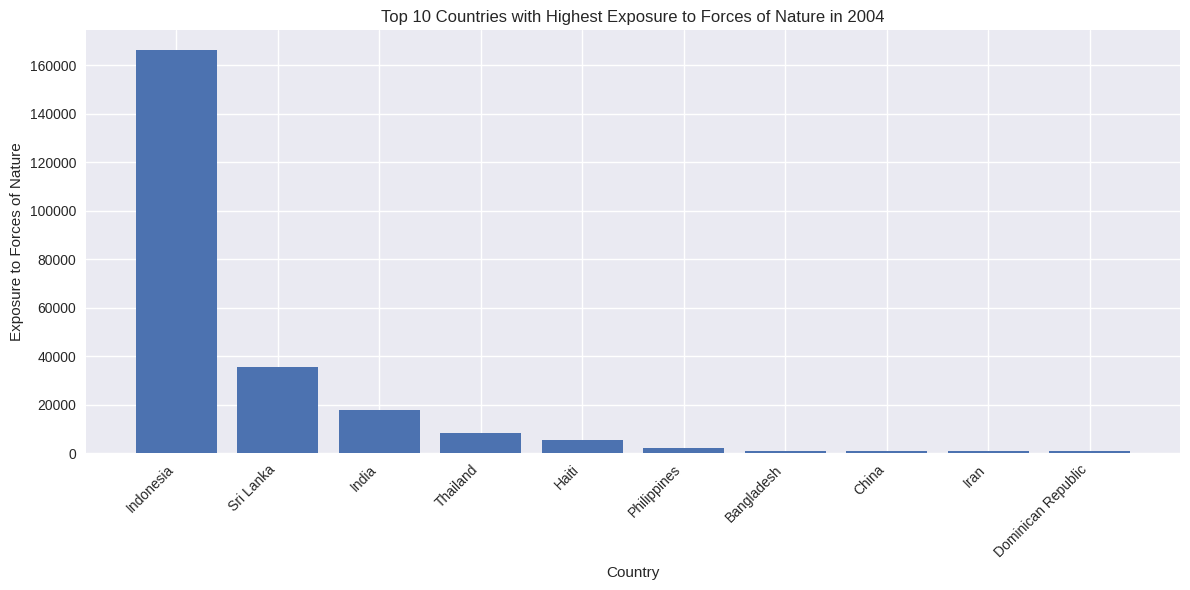

In [ ]:
# prompt: plot graph Exposure to forces of nature top 10 country for year 2004

# Assuming df_Main_data is your DataFrame
df_2004 = df_Main_data[df_Main_data['Year'] == 2004]

# Sort by Exposure_to_Forces_of_Nature in descending order
top_10_2004 = df_2004.sort_values('Exposure_to_Forces_of_Nature', ascending=False).head(10)

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(top_10_2004['Country'], top_10_2004['Exposure_to_Forces_of_Nature'])
plt.xlabel('Country')
plt.ylabel('Exposure to Forces of Nature')
plt.title('Top 10 Countries with Highest Exposure to Forces of Nature in 2004')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

ในวันที่ 26 ธันวาคม 2004 เกิดแผ่นดินไหวขนาด 9.1-9.3 แมกนิจูด นอกชายฝั่งของเกาะสุมาตรา ประเทศอินโดนีเซีย ทำให้เกิดคลื่นสึนามิขนาดใหญ่ที่ซัดเข้าถล่มชายฝั่งของหลายประเทศรอบมหาสมุทรอินเดีย ส่งผลให้มีผู้เสียชีวิตจำนวนมาก และสร้างความเสียหายทางทรัพย์สินอย่างมหาศาล เห็นได้ดังกราฟข้างต้น

###Malaria

In [ ]:
# prompt: plot graph Malaria by year for continent

# Assuming df_Main_data is your DataFrame
# and it has columns like 'Year', 'Continent', and 'Malaria_Deaths'

# Group data by year and continent, summing Malaria deaths
malaria_by_year_continent = df_Main_data.groupby(['Year', 'Continent'])['Malaria'].sum().reset_index()

# Create the plot using Plotly Express
fig = px.line(malaria_by_year_continent, x='Year', y='Malaria', color='Continent',
             title='Malaria Deaths by Year and Continent')
fig.show()

โรคมาลาเรียเป็นหนึ่งในโรคติดเชื้อที่ร้ายแรงที่สุดในโลก โดยเฉพาะในภูมิภาคเขตร้อนและกึ่งเขตร้อน ซึ่งแพร่เชื้อสู่มนุษย์ผ่านการกัดของยุงก้นปล่อง ช่วงปี 2000 - 2009 เป็นช่วงเวลาที่มีความก้าวหน้าอย่างมากในการพัฒนาวัคซีนมาลาเรีย แม้จะยังไม่สามารถป้องกันโรคได้อย่างสมบูรณ์ แต่การวิจัยและการทดสอบวัคซีน ก็ถือเป็นก้าวสำคัญที่ช่วยให้เกิดการพัฒนาในอนาคต เห็นได้จากกราฟข้างต้น ที่มีการลดลงของการเสียชีวิตของโรค Malaria ภายหลังช่วงปี 2009 เป็นต้นไป

###Diarrheal

In [ ]:
# prompt: plot graph Diarrheal diseases by year for continent

# Assuming df_Main_data is your DataFrame
# and it has columns like 'Year', 'Continent', and 'Diarrheal_diseases_Deaths'

# Group data by year and continent, summing Diarrheal diseases deaths
diarrheal_by_year_continent = df_Main_data.groupby(['Year', 'Continent'])['Diarrheal_Diseases'].sum().reset_index()

# Create the plot using Plotly Express
fig = px.line(diarrheal_by_year_continent, x='Year', y='Diarrheal_Diseases', color='Continent',
             title='Diarrheal diseases Deaths by Year and Continent')
fig.show()

In [ ]:
# prompt: plot line graph top 5 country in Asia by year for Diarrheal Diseases

# Assuming df_Main_data is your DataFrame
# and it has columns like 'Year', 'Country', and 'Diarrheal_Diseases'

# Filter for Asia
df_asia = df_Main_data[df_Main_data['Continent'] == 'Asia']

# Group data by year and country, summing Diarrheal diseases deaths
diarrheal_by_year_country_asia = df_asia.groupby(['Year', 'Country'])['Diarrheal_Diseases'].sum().reset_index()

# Find top 5 countries in Asia by total Diarrheal diseases deaths across all years
top_5_countries = diarrheal_by_year_country_asia.groupby('Country')['Diarrheal_Diseases'].sum().nlargest(5).index.tolist()

# Filter data for the top 5 countries
df_top_5 = diarrheal_by_year_country_asia[diarrheal_by_year_country_asia['Country'].isin(top_5_countries)]

# Create the plot using Plotly Express
fig = px.line(df_top_5, x='Year', y='Diarrheal_Diseases', color='Country',
             title='Top 5 Countries in Asia by Diarrheal Diseases Deaths (1990-2019)')
fig.show()

In [ ]:
# prompt: plot line graph top 5 country in Africa by year for Diarrheal Diseases

# Assuming df_Main_data is your DataFrame
# and it has columns like 'Year', 'Country', and 'Diarrheal_Diseases'

# Filter for Africa
df_africa = df_Main_data[df_Main_data['Continent'] == 'Africa']

# Group data by year and country, summing Diarrheal diseases deaths
diarrheal_by_year_country_africa = df_africa.groupby(['Year', 'Country'])['Diarrheal_Diseases'].sum().reset_index()

# Find top 5 countries in Africa by total Diarrheal diseases deaths across all years
top_5_countries = diarrheal_by_year_country_africa.groupby('Country')['Diarrheal_Diseases'].sum().nlargest(5).index.tolist()

# Filter data for the top 5 countries
df_top_5 = diarrheal_by_year_country_africa[diarrheal_by_year_country_africa['Country'].isin(top_5_countries)]

# Create the plot using Plotly Express
fig = px.line(df_top_5, x='Year', y='Diarrheal_Diseases', color='Country',
             title='Top 5 Countries in Africa by Diarrheal Diseases Deaths (1990-2019)')
fig.show()

โรคท้องร่วงเป็นหนึ่งในสาเหตุสำคัญของการเสียชีวิตของประชากรโลก เนื่องจากการขาดความเข้าถึงของน้ำสะอาดและการมีสุขาภิบาลที่ดี ในช่วงปี 2000-2010 จึงมีการริเริ่มโครงการระดับโลกที่มุ่งเน้นการเพิ่มการเข้าถึงน้ำดื่มที่สะอาดเพื่อลดการเสียชีวิตจากโรคที่เกี่ยวกับน้ำ ส่งผลให้การเสียชีวิตจากโรคท้องร่วงลดลงอย่างมีนัยสำคัญ ซึ่งเห็นได้ดังกราฟข้างต้น

##Summary

**สรุปภาพรวมการวิเคราะห์ข้อมูลการเสียชีวิตทั่วโลก (1990-2019)**

จากข้อมูลที่นำเสนอในช่วงปี 1990-2019 จะเห็นว่าอัตราการเสียชีวิตและเหตุการณ์ต่าง ๆ มีความเกี่ยวข้องกันและดำเนินไปในทิศทางเดียวกัน ซึ่งช่วยให้เราเข้าใจถึงสาเหตุที่ทำให้จำนวนผู้เสียชีวิตเพิ่มขึ้นในบางช่วงเวลาและลดลงในช่วงอื่น ๆ ตัวอย่างเช่น การเข้าถึงน้ำดื่มสะอาดได้มีส่วนสำคัญในการลดอัตราการเสียชีวิตจากโรคที่เกิดจากน้ำอย่างเช่น อหิวาตกโรคและอุจจาระร่วง

นอกจากนี้ การพัฒนาวัคซีนในการรักษาโรคมาลาเรียในหลายประเทศก็มีผลอย่างมากต่อการลดอัตราการเสียชีวิตในกลุ่มเด็กและประชากรที่อาศัยอยู่ในพื้นที่ที่มีการแพร่ระบาดของโรคนี้ การระบาดของโรคที่เกิดจากน้ำและมาลาเรียนั้นสามารถควบคุมได้มากขึ้นด้วยการใช้วิธีการที่มีประสิทธิภาพ

ในทางกลับกัน เหตุการณ์ทางธรรมชาติ เช่น แผ่นดินไหวและสึนามิในปี 2004 ทำให้จำนวนผู้เสียชีวิตเพิ่มขึ้นอย่างรวดเร็วในบางพื้นที่ ซึ่งเป็นการเตือนให้เห็นถึงความสำคัญของการเตรียมความพร้อมและระบบการป้องกันภัยพิบัติ

การวิเคราะห์ข้อมูลเหล่านี้ไม่เพียงแค่แสดงให้เห็นถึงความสัมพันธ์ระหว่างอัตราการเสียชีวิตและเหตุการณ์ต่าง ๆ แต่ยังสามารถนำไปประยุกต์ใช้เพื่อป้องกันและแก้ไขปัญหาที่อาจเกิดขึ้นในอนาคตได้อย่างมีประสิทธิภาพ โดยการพัฒนานโยบายและกลยุทธ์ที่มุ่งเน้นการลดความเสี่ยงและการป้องกันการเกิดโรคในประชากรที่เปราะบาง